    Variables Description:
- C1 Number of distinct terminals in the grid
- C2 Number of distinct terminals in roaming in the grid
- C3 Number of distinct terminals that remained in the grid
- C4 Number of distinct terminals that remained in the grid in roaming
- C5 Number of distinct terminal entries in the grid
- C6 Number of distinct terminal exits from the grid
- C7 Number of distinct terminal entries in roaming in the grid
- C8 Number of distinct terminal exits in roaming from the grid
- C9 Number of distinct terminals with active data connection in the grid
- C10 Number of distinct terminals with active data connection in roaming in the grid
- C11 Number of voice calls originating from the grid
- C12 Number of entries in Lisbon through the 11 main road axes
- C13 Number of exits from Lisbon through the 11 main road axes
- D1 Top 10 countries of origin for roaming terminal equipment
- E1 Number of voice calls that terminated in the grid
- E2 Average downstream rate in the grid within the grid
- E3 Average upstream rate in the grid
- E4 Peak downstream rate in the grid
- E5 Peak upstream rate in the grid
- E6 Top 10 Applications (Text with names separated by ;)
- E7 Minimum duration of stay within the grid
- E8 Average duration of stay within the grid
- E9 Maximum duration of stay within the grid
- E10 Number of devices that participate in the connection sharing within the grid

In [101]:
import pandas as pd
import glob

csv_files = glob.glob('data/DataSetSamples/*.csv')

dfs = []

for csv_file in csv_files:
    df = pd.read_csv(csv_file, dtype={'D1': 'string', 'E6': 'string'})
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)


In [102]:
print(df.shape)
df.head()

(6000000, 32)


Unnamed: 0  Grid_ID                  Datetime  extract_year_2  \
0           0        1  2021-10-05T07:15:00.000Z         2021.00   
1           1        4  2021-10-05T07:15:00.000Z         2021.00   
2           2        7  2021-10-05T07:15:00.000Z         2021.00   
3           3       12  2021-10-05T07:15:00.000Z         2021.00   
4           4       18  2021-10-05T07:15:00.000Z         2021.00   

   extract_month_3  extract_day_4    C1   C2    C3   C4  ...      E5    E6  \
0            10.00           5.00  8.93 8.93  5.95 5.95  ...    0.00  <NA>   
1            10.00           5.00  0.00 0.00  0.00 0.00  ...    0.00  <NA>   
2            10.00           5.00 10.00 0.00 10.00 0.00  ...  296.00  <NA>   
3            10.00           5.00  0.00 0.00  0.00 0.00  ...    0.00  <NA>   
4            10.00           5.00  2.98 2.98  2.98 2.98  ... 5966.00  <NA>   

     E7    E8    E9  E10  Unnamed: 0.1 extract_year  extract_month  \
0  0.00  0.75  9.00 0.00           NaN          NaN            NaN   
1  0.00  0.00  0.00 0.00           NaN          NaN            NaN   
2 10.00 10.00 10.00 0.00           NaN          NaN            NaN   
3  0.00  0.00  0.00 0.00           NaN          NaN            NaN   
4  9.00  9.00  9.00 0.00           NaN          NaN            NaN   

   extract_day  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 32 columns]

In [103]:
print(df.info(show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 32 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       6000000 non-null  int64  
 1   Grid_ID          6000000 non-null  int64  
 2   Datetime         6000000 non-null  object 
 3   extract_year_2   3500000 non-null  float64
 4   extract_month_3  3500000 non-null  float64
 5   extract_day_4    3500000 non-null  float64
 6   C1               6000000 non-null  float64
 7   C2               6000000 non-null  float64
 8   C3               6000000 non-null  float64
 9   C4               6000000 non-null  float64
 10  C5               6000000 non-null  float64
 11  C6               6000000 non-null  float64
 12  C7               6000000 non-null  float64
 13  C8               6000000 non-null  float64
 14  C9               6000000 non-null  float64
 15  C10              6000000 non-null  float64
 16  C11              6

Columns with a NaN values in the dataset:
- **Unnamed: 0.1** - have only index values in float type, so we can drop it
- **Unnamed: 0** - same as above, but index values are in int type
- **extract_year, extract_month, extract_day** - we have **Datetime**, so we can drop it
- **D1** - include roaming information in the grid, so NaN values also represent some information, which can be used later
- **E6** - include most used apps in the grid, so NaN values can also represent some information, but it needs future investigation
- **extract_year_2, extract_month_3, extract_day_4** - we have **DateTime** column, so we can drop it

In [104]:
drop_columns = ['Unnamed: 0', 'Unnamed: 0.1', 'extract_year', 'extract_month', 'extract_day', 'extract_year_2', 'extract_month_3', 'extract_day_4']
df.drop(drop_columns, axis=1, inplace=True)
df.head()

Grid_ID                  Datetime    C1   C2    C3   C4   C5    C6   C7  \
0        1  2021-10-05T07:15:00.000Z  8.93 8.93  5.95 5.95 8.93  2.58 8.93   
1        4  2021-10-05T07:15:00.000Z  0.00 0.00  0.00 0.00 0.00  0.00 0.00   
2        7  2021-10-05T07:15:00.000Z 10.00 0.00 10.00 0.00 0.00  6.11 0.00   
3       12  2021-10-05T07:15:00.000Z  0.00 0.00  0.00 0.00 0.00  0.00 0.00   
4       18  2021-10-05T07:15:00.000Z  2.98 2.98  2.98 2.98 0.00 29.13 0.00   

    C8  ...   E1   E2      E3   E4      E5    E6    E7    E8    E9  E10  
0 2.58  ... 0.00 0.00    0.00 0.00    0.00  <NA>  0.00  0.75  9.00 0.00  
1 0.00  ... 0.00 0.00    0.00 0.00    0.00  <NA>  0.00  0.00  0.00 0.00  
2 0.00  ... 0.00 0.00  148.00 0.00  296.00  <NA> 10.00 10.00 10.00 0.00  
3 0.00  ... 0.00 0.00    0.00 0.00    0.00  <NA>  0.00  0.00  0.00 0.00  
4 0.00  ... 0.00 0.00 1011.30 0.00 5966.00  <NA>  9.00  9.00  9.00 0.00  

[5 rows x 24 columns]

Datetime column need to be converted, but it contains values in different formats, so we need to convert it to one format first.

In [105]:
datetimes = pd.to_datetime(df['Datetime'], utc=True, errors='coerce')
is_utc_dates = datetimes.isna()
utc_datetimes = df[is_utc_dates]['Datetime']

utc_datetimes = pd.to_datetime(utc_datetimes, utc=True)
datetimes = pd.concat([datetimes[~is_utc_dates], utc_datetimes], axis=0)
datetimes.sort_index(inplace=True)
df['Datetime'] = datetimes

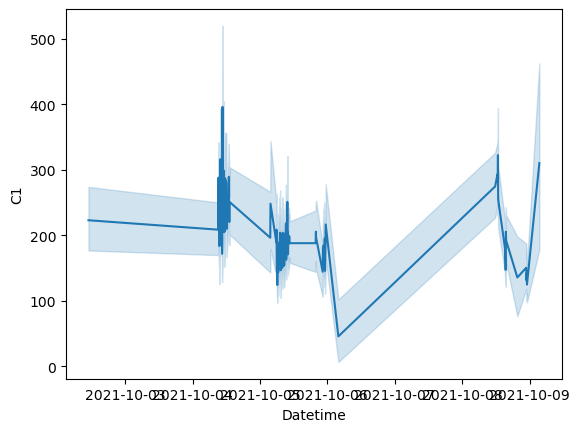

In [106]:
import seaborn as sns

batch_df = df.iloc[:10000]
sns.lineplot(x='Datetime', y='C1', data=batch_df)
print()

In [107]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe().T

count       mean         std  min   25%      50%       75%  \
Grid_ID 6000000.00     233.95      188.92 1.00 55.00   211.00    368.00   
C1      6000000.00     132.27      195.90 0.00 19.41    65.24    166.73   
C2      6000000.00       9.56       23.34 0.00  0.00     2.31      8.26   
C3      6000000.00     101.87      158.57 0.00 14.45    48.97    124.97   
C4      6000000.00       7.17       18.12 0.00  0.00     1.87      6.20   
C5      6000000.00      58.82       97.32 0.00  4.77    24.66     73.00   
C6      6000000.00      66.57       97.64 0.00  9.52    33.34     85.54   
C7      6000000.00       4.44       11.64 0.00  0.00     0.00      3.80   
C8      6000000.00       4.35       10.37 0.00  0.00     1.12      4.03   
C9      6000000.00     128.71      191.39 0.00 18.78    63.35    162.17   
C10     6000000.00       9.47       23.08 0.00  0.00     2.30      8.19   
C11     6000000.00       2.90       10.30 0.00  0.00     0.00      1.98   
E1      6000000.00       0.87        4.56 0.00  0.00     0.00      0.00   
E2      6000000.00   48707.69  2310141.97 0.00  0.00   209.91  10579.54   
E3      6000000.00   10849.49   785993.94 0.00 13.00   974.25   3602.27   
E4      6000000.00 3276882.58 21957504.84 0.00  0.00  6670.00 960683.25   
E5      6000000.00  736528.94 10292711.33 0.00 83.00 19341.00 179723.00   
E7      6000000.00       0.39        4.80 0.00  0.00     0.00      0.00   
E8      6000000.00       6.16       12.81 0.00  3.33     4.84      6.40   
E9      6000000.00      60.55       77.97 0.00 13.00    33.00     65.00   
E10     6000000.00       0.00        0.08 0.00  0.00     0.00      0.00   

                  max  
Grid_ID        999.00  
C1           22976.62  
C2            1411.68  
C3           22075.13  
C4            1411.68  
C5           21629.59  
C6            9934.08  
C7             462.79  
C8             387.96  
C9           22976.62  
C10           1411.68  
C11           4219.06  
E1            1707.65  
E2      2500008960.00  
E3       573131460.00  
E4      4981391900.00  
E5      3140957696.00  
E7             300.00  
E8             300.00  
E9             300.00  
E10             39.54

In [108]:
import geopandas as gpd
import pandas as pd
import numpy as np

from shapely import wkt

grids_df = pd.read_csv('data/wktComplete.csv', encoding='latin-1', index_col='grelha_id')
grids_df['geometry'] = grids_df.wkt.apply(wkt.loads)
grids_geo = gpd.GeoDataFrame(grids_df) 
grids_geo.sort_index(inplace=True)
grids_geo.set_crs(epsg=4326, inplace=True)
grids_geo.to_crs(epsg=3857, inplace=True)
grids_geo.head()

dicofre                              entity_id  \
grelha_id                                                   
1           110658  coi.tematica.grelha.lx.atributos.3518   
2           110658  coi.tematica.grelha.lx.atributos.3519   
3           110658  coi.tematica.grelha.lx.atributos.3520   
4           110658  coi.tematica.grelha.lx.atributos.3521   
5           110658  coi.tematica.grelha.lx.atributos.3522   

                                entity_type freguesia  \
grelha_id                                               
1          coi.tematica.grelha.lx.atributos     Belém   
2          coi.tematica.grelha.lx.atributos     Belém   
3          coi.tematica.grelha.lx.atributos     Belém   
4          coi.tematica.grelha.lx.atributos     Belém   
5          coi.tematica.grelha.lx.atributos     Belém   

                                            freguesias  grelha_x  grelha_y  \
grelha_id                                                                    
1          Santa Maria de Belém + São Francisco Xavier         4         1   
2          Santa Maria de Belém + São Francisco Xavier         5         1   
3          Santa Maria de Belém + São Francisco Xavier         6         1   
4          Santa Maria de Belém + São Francisco Xavier         7         1   
5          Santa Maria de Belém + São Francisco Xavier         8         1   

           latitude  longitude                       nome  objectid  \
grelha_id                                                             
1             38.69      -9.23  Área ribeirinha Pedrouços         1   
2             38.69      -9.22  Área ribeirinha Pedrouços         2   
3             38.69      -9.22  Área ribeirinha Pedrouços         3   
4             38.69      -9.22             Torre de Belém         4   
5             38.69      -9.22             Torre de Belém         5   

                                                    position  \
grelha_id                                                      
1          {'type': 'GeometryCollection', 'geometries': [...   
2          {'type': 'GeometryCollection', 'geometries': [...   
3          {'type': 'GeometryCollection', 'geometries': [...   
4          {'type': 'GeometryCollection', 'geometries': [...   
5          {'type': 'GeometryCollection', 'geometries': [...   

                                                         wkt  \
grelha_id                                                      
1          MULTIPOLYGON (((-9.22412591616028 38.691391736...   
2          MULTIPOLYGON (((-9.22232928559204 38.691391736...   
3          MULTIPOLYGON (((-9.2205326550238 38.6913917367...   
4          MULTIPOLYGON (((-9.21873602445556 38.691391736...   
5          MULTIPOLYGON (((-9.21693939388732 38.691391736...   

                                                    geometry  
grelha_id                                                     
1          MULTIPOLYGON (((-1026825.000 4677562.000, -102...  
2          MULTIPOLYGON (((-1026625.000 4677562.000, -102...  
3          MULTIPOLYGON (((-1026425.000 4677562.000, -102...  
4          MULTIPOLYGON (((-1026225.000 4677562.000, -102...  
5          MULTIPOLYGON (((-1026025.000 4677562.000, -102...

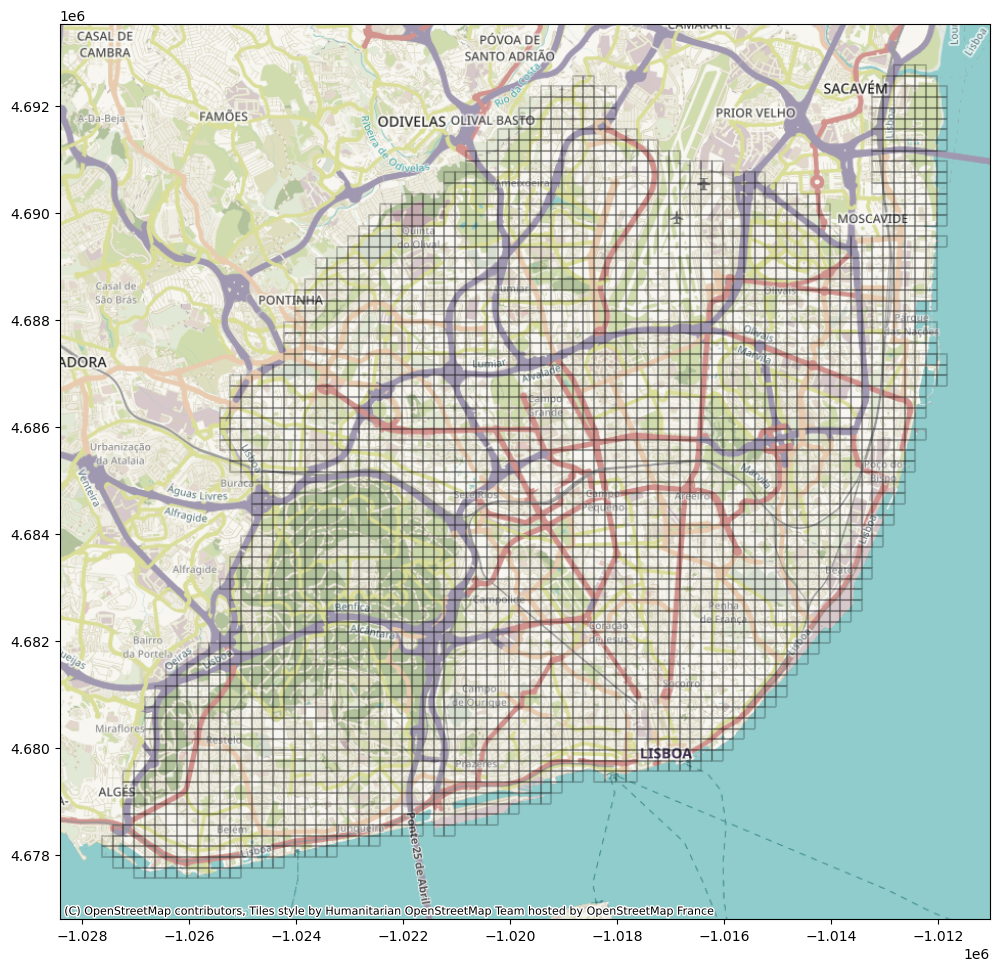

In [109]:
import contextily as ctx

ax = grids_geo.boundary.plot(color='black', figsize=(12, 12), alpha=0.2)
ctx.add_basemap(ax, crs=grids_geo.crs.to_string())

    Main road to consideration:
- Ponte Vasco da Gama:
3651/3629
- A36 (Túnel do Grilo)
3563/3564/3565
- IC16
3319/3320
- N117 (Cabos Ávila)
933/934/990
- Marginal
75/76
- IC2 (Sacavém)
3736/3728
- A1
3524/3564
- Calçada de Carriche
3460/3500/3501
- IC19
1758/1759/1699
- A5
698/757/758
- Ponte 25 Abril
102/103

<Axes: title={'center': 'All Streets'}>

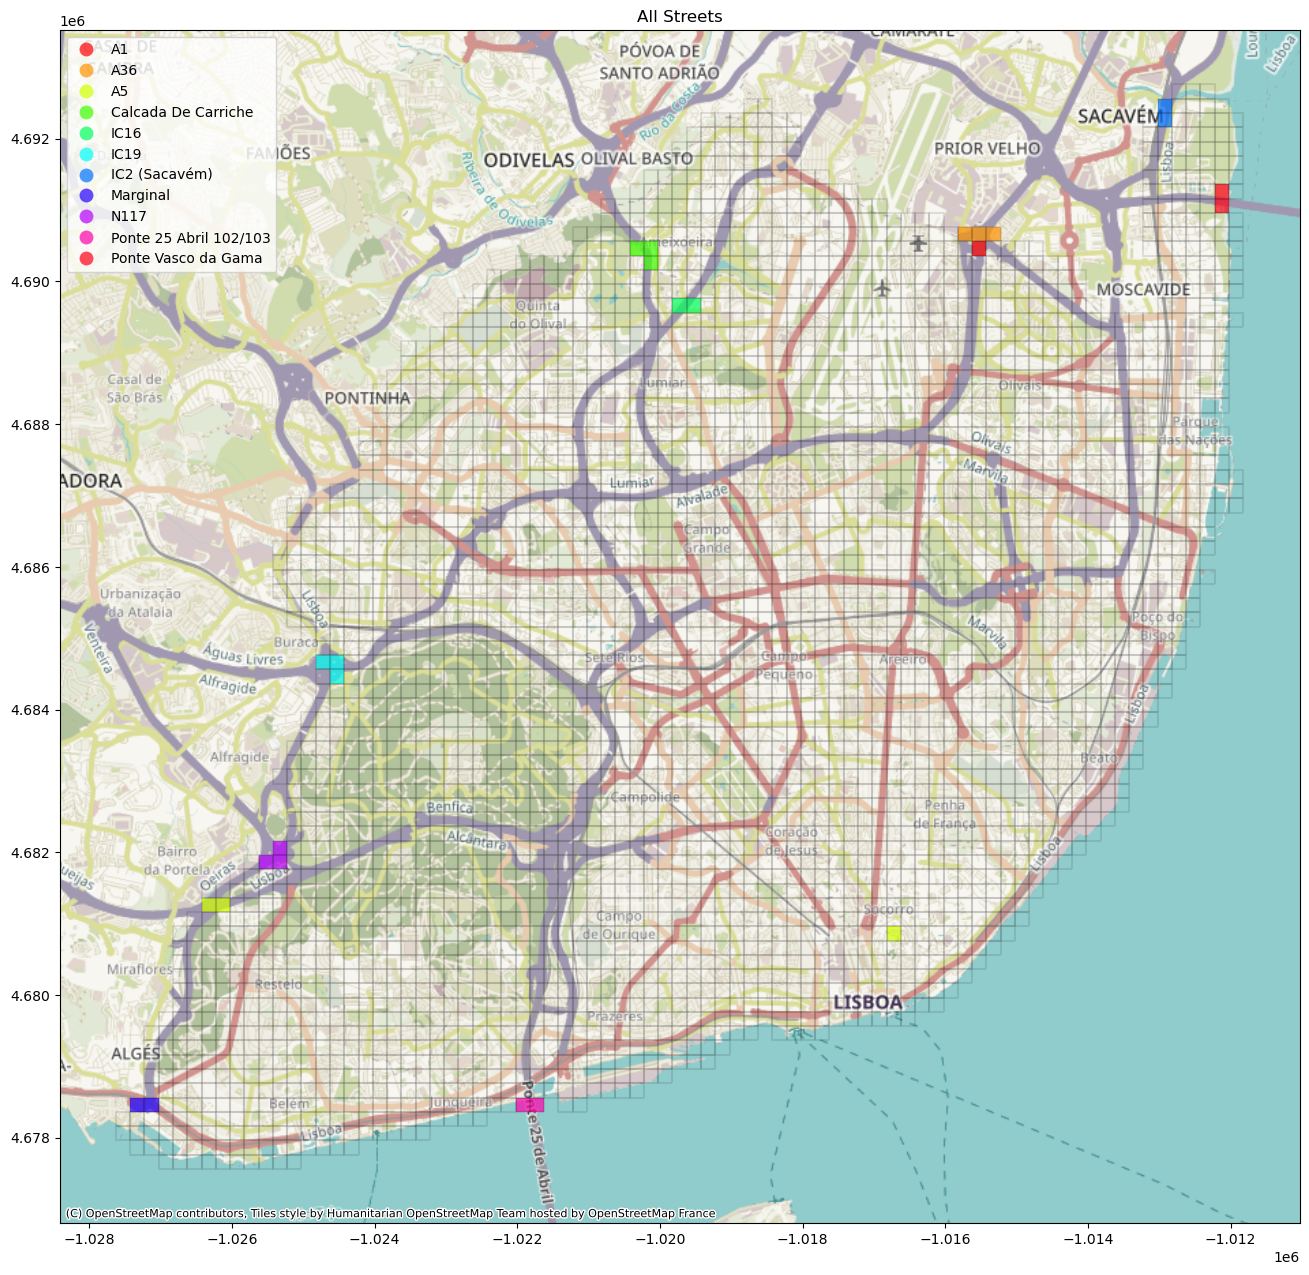

In [110]:
import folium as fl

def assign_street_name(grid_id):
    for street, grid_ids in street_names.items():
        if grid_id in grid_ids:
            return street
    return None


street_names = {
    "Ponte Vasco da Gama": [3651, 3629],
    "A36": [3563, 3564, 3565],
    "IC16": [3319, 3320],
    "N117": [933, 934, 990],
    "Marginal": [75, 76],
    "IC2 (Sacavém)": [3736, 3728],
    "A1": [3524, 3564],
    "Calcada De Carriche": [3460, 3500, 3501],
    "IC19": [1758, 1759, 1699],
    "A5": [689, 757, 758],
    "Ponte 25 Abril 102/103": [102, 103],
}



grids_geo['Street_Name'] = grids_geo.index.map(assign_street_name)
main_streets_grids_geo = grids_geo[grids_geo.Street_Name.notna()]

all_streets_ax = grids_geo.boundary.plot(color='black', alpha=0.1, figsize=(16, 16))
all_streets_ax.set_title('All Streets')
ctx.add_basemap(all_streets_ax, crs=grids_geo.crs.to_string())
main_streets_grids_geo.plot(ax=all_streets_ax, column='Street_Name', legend=True, legend_kwds={'loc': 'upper left'}, alpha=0.7, cmap='hsv')

In [123]:
main_streets_grids_geo.explore(
    column='Street_Name', cmap='hsv', legend=True, tooltip=['grelha_id'],
    popup=['grelha_id', 'latitude', 'longitude', 'Street_Name', "freguesia", "freguesias"])

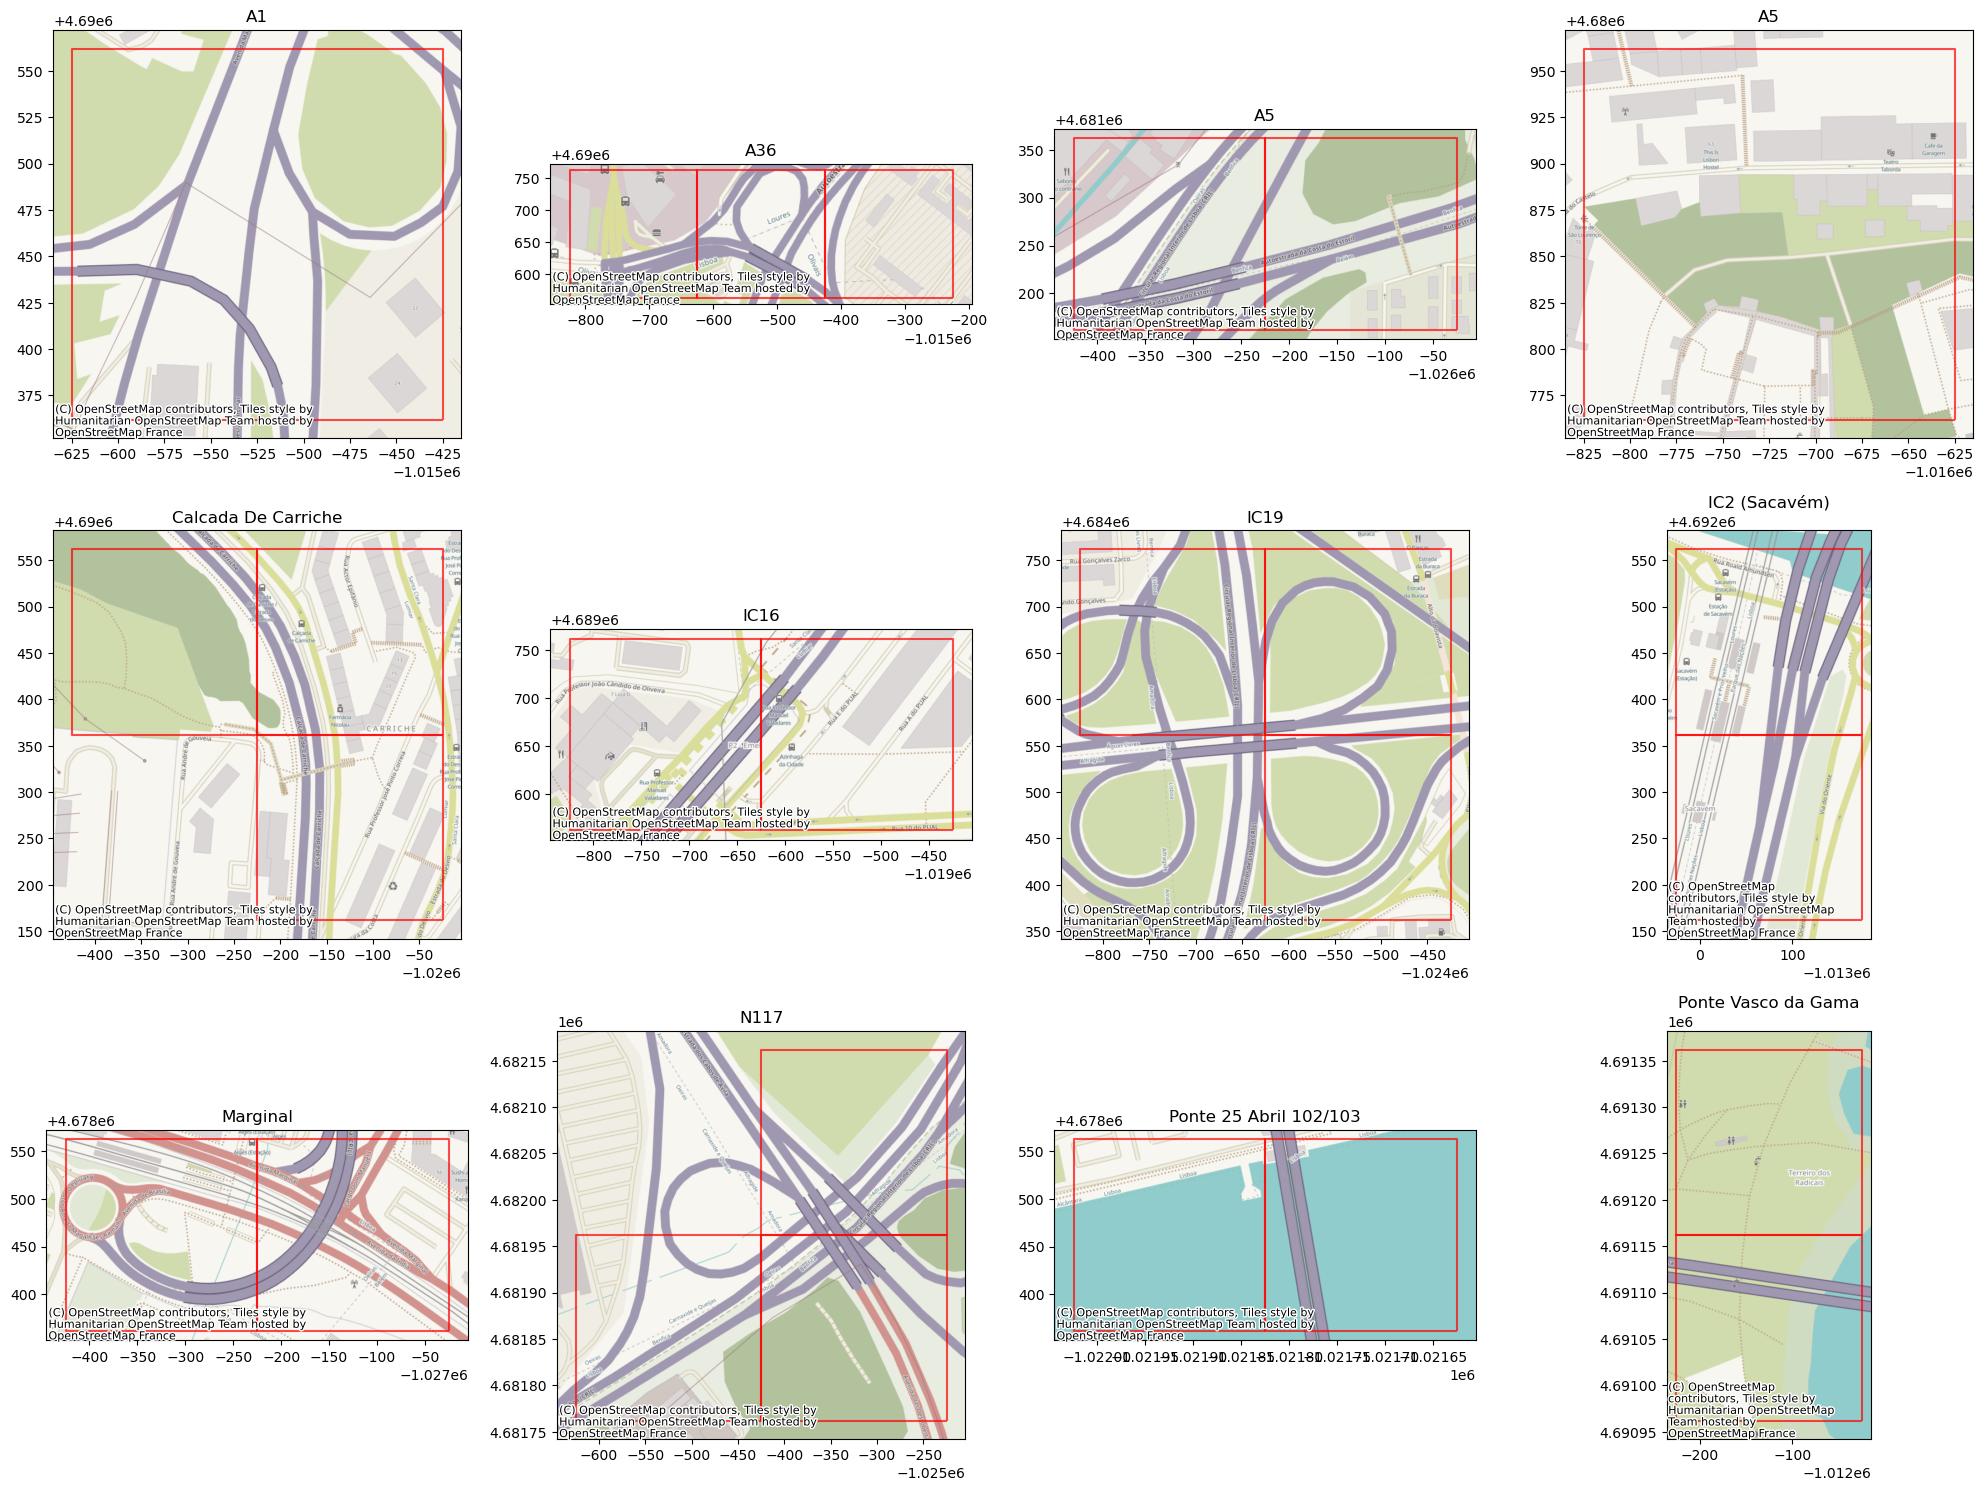

In [112]:

import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

streets_grids_geo = grids_geo[grids_geo.Street_Name.notna()].copy()

for (street, street_grids_geo) in streets_grids_geo.groupby('Street_Name'):
    indexes = street_grids_geo.index.to_list()
    street_grids_geo['centroid'] = street_grids_geo.geometry.centroid
    distances = street_grids_geo['centroid'].apply(lambda x: street_grids_geo['centroid'].distance(x))
    distances_condensed = squareform(distances)

    if (distances_condensed.size == 0):
        streets_grids_geo.loc[indexes, 'cluster'] = 1
        continue
    
    linkage_data = linkage(distances_condensed, method='complete', metric='euclidean')
    clusters = fcluster(linkage_data, 500, criterion='distance')
    streets_grids_geo.loc[indexes, 'cluster'] = clusters

for ax, ((street, _), grids) in zip(axs.flat, streets_grids_geo.groupby(['Street_Name', 'cluster'])):
    street_ax = grids.boundary.plot(ax=ax, color='red', alpha=0.7)
    street_ax.set_title(street)
    ctx.add_basemap(street_ax, crs=street_grids_geo.crs.to_string())

plt.tight_layout()
plt.show()